## 0. Setup

In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import plot_data
from matplotlib.pyplot import plot, title, axis
from matplotlib import pyplot as plt

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [4]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    x = torch.add(torch.mul(torch.rand(n_samples), -2), 1)
    y = torch.pow(x, 2)
    return x.to(device), y.to(device)

In [5]:
# Generate the data with n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(128)

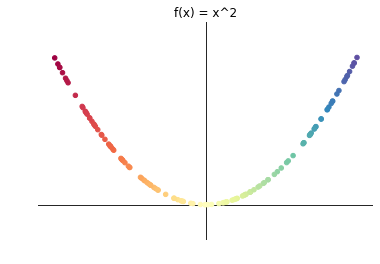

In [6]:
# Visualize the data
plot_data(x_quadr, y_quadr, auto=True, title="f(x) = x^2")

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [7]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    x = torch.add(torch.mul(torch.rand(n_samples), -2), 1)
    y = torch.pow(x, 3) - torch.mul(x, 0.5)
    return x.to(device), y.to(device)

In [8]:
# Generate the data with n_samples = 128
x_cubic, y_cubic = cubic_data_generator(128)

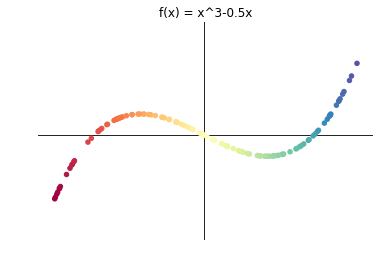

In [9]:
# Visualize the data 
plot_data(x_cubic, y_cubic, auto=True, title="f(x) = x^3-0.5x")

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [10]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    x = torch.add(torch.mul(torch.rand(n_samples), -2), 1)
    y = torch.sin(torch.mul(x, 2.5))
    return x.to(device), y.to(device)

In [11]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(128)

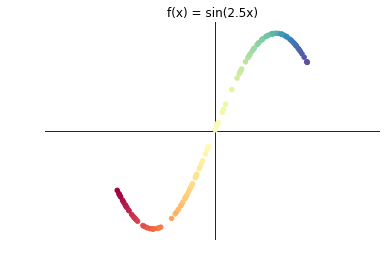

In [12]:
# Visualize the data 
plot_data(x_sine, y_sine, auto=True, title="f(x) = sin(2.5x)")

### 1.4 Absolute value: $y = f(x) = |x|$

In [13]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    x = torch.add(torch.mul(torch.rand(n_samples), -2), 1)
    y = torch.abs(x)
    return x.to(device), y.to(device)

In [14]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(128)

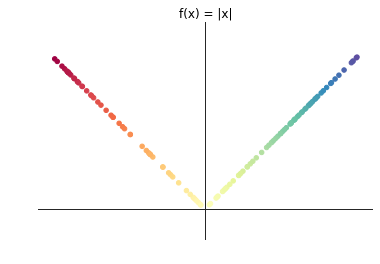

In [15]:
# Visualize the data 
plot_data(x_abs, y_abs, auto=True, title="f(x) = |x|")

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [16]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    x = torch.add(torch.mul(torch.rand(n_samples), -2), 1)
    y = (x >= 0).type(torch.FloatTensor)
    return x.to(device), y.to(device)

In [17]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(128)

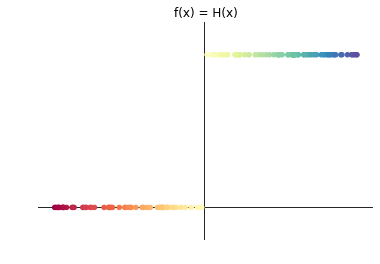

In [18]:
# Visualize the data 
plot_data(x_hs, y_hs, auto=True, title="f(x) = H(x)")

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [19]:
input_dim = 1
output_dim = 1

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [20]:
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H, self).__init__()
        
        # Layers
        self.network = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.network(x)

### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [21]:
class Linear_1H(nn.Module):
    def __init__(self):
        super(Linear_1H, self).__init__()
        self.n_hidden = 3
        
        # Layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, self.n_hidden), 
            nn.ReLU(), 
            nn.Linear(self.n_hidden, output_dim)
        )

    def forward(self, x):
        return self.network(x)

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [22]:
class Linear_2H(nn.Module):
    def __init__(self):
        super(Linear_2H, self).__init__()
        self.n_hidden = 3
        
        # Layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, self.n_hidden), 
            nn.ReLU(), 
            nn.Linear(self.n_hidden, self.n_hidden),
            nn.ReLU(), 
            nn.Linear(self.n_hidden, output_dim)
        )

    def forward(self, x):
        return self.network(x)

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [23]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    criterion = nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    
    # Define if the model finished training early
    early_stop = False
    
    # Training loop
    for epoch in range(epochs):
        # Forward data through model 
        y_pred = model(x.view(-1, 1))
        
        # Compute the loss 
        loss = criterion(y_pred, y.view(-1, 1))
        
        # Zero-out the optimizer 
        optimizer.zero_grad()
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 1000 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            early_stop = True
            break    
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach(), early_stop

### 3.2. `Linear_0H`

In [24]:
# Define list of booleans for early stop
early_stop = [False for _ in range(15)]

In [25]:
# Define model
model_0H = Linear_0H().to(device)

In [26]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[0] = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.2468349933624268
Epoch 1000 loss: 0.08339332044124603
Epoch 2000 loss: 0.08339308202266693
Epoch 3000 loss: 0.08339308202266693
Epoch 4000 loss: 0.08339308202266693
Epoch 5000 loss: 0.08339308202266693
Epoch 6000 loss: 0.08339308202266693
Epoch 7000 loss: 0.08339308202266693
Epoch 8000 loss: 0.08339308202266693
Epoch 9000 loss: 0.08339308202266693
Epoch 10000 loss: 0.08339308202266693


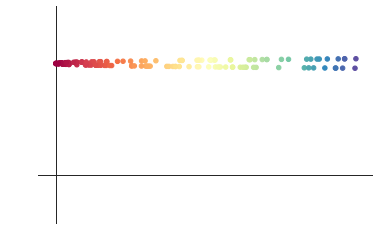

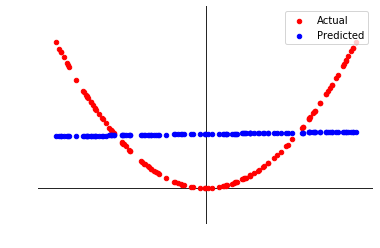

In [27]:
# Plot predictions vs actual data
plot_data(y_quadr, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_quadr, y_pred.view(-1))))
plot_data(x_quadr, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [28]:
# Define model
model_0H = Linear_0H().to(device)

In [29]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred, early_stop[1] = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.3365343511104584
Epoch 1000 loss: 0.021107621490955353
Epoch 2000 loss: 0.021106980741024017
Epoch 3000 loss: 0.021106980741024017
Epoch 4000 loss: 0.021106980741024017
Epoch 5000 loss: 0.021106980741024017
Epoch 6000 loss: 0.021106980741024017
Epoch 7000 loss: 0.021106980741024017
Epoch 8000 loss: 0.021106980741024017
Epoch 9000 loss: 0.021106980741024017
Epoch 10000 loss: 0.021106980741024017


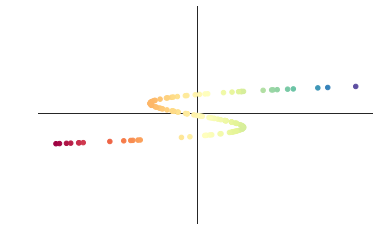

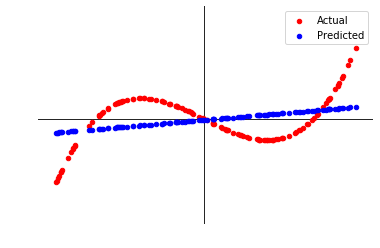

In [30]:
# Plot predictions vs actual data
plot_data(y_cubic, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_cubic, y_pred.view(-1))))
plot_data(x_cubic, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [31]:
# Define model
model_0H = Linear_0H().to(device)

In [32]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred, early_stop[2] = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.6671091318130493
Epoch 1000 loss: 0.07579762488603592
Epoch 2000 loss: 0.07579747587442398
Epoch 3000 loss: 0.07579747587442398
Epoch 4000 loss: 0.07579747587442398
Epoch 5000 loss: 0.07579747587442398
Epoch 6000 loss: 0.07579747587442398
Epoch 7000 loss: 0.07579747587442398
Epoch 8000 loss: 0.07579747587442398
Epoch 9000 loss: 0.07579747587442398
Epoch 10000 loss: 0.07579747587442398


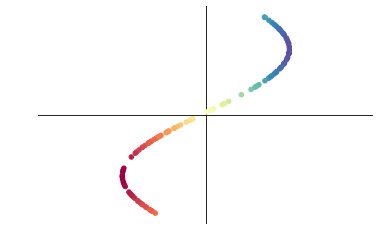

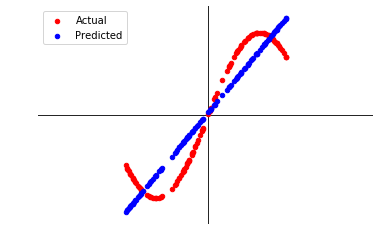

In [33]:
# Plot predictions vs actual data
plot_data(y_sine, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_sine, y_pred.view(-1))))
plot_data(x_sine, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [34]:
# Define model
model_0H = Linear_0H().to(device)

In [35]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[3] = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.5330982208251953
Epoch 1000 loss: 0.07780567556619644
Epoch 2000 loss: 0.07780542969703674
Epoch 3000 loss: 0.07780542969703674
Epoch 4000 loss: 0.07780542969703674
Epoch 5000 loss: 0.07780542969703674
Epoch 6000 loss: 0.07780542969703674
Epoch 7000 loss: 0.07780542969703674
Epoch 8000 loss: 0.07780542969703674
Epoch 9000 loss: 0.07780542969703674
Epoch 10000 loss: 0.07780542969703674


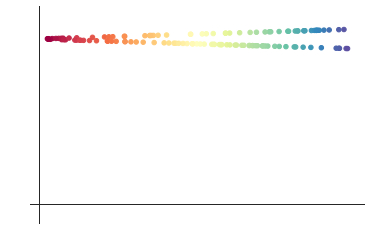

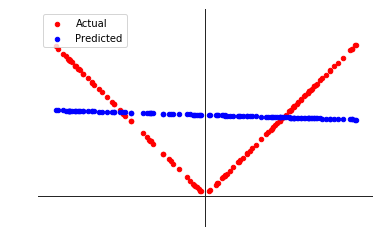

In [36]:
# Plot predictions vs actual data
plot_data(y_abs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_abs, y_pred.view(-1))))
plot_data(x_abs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [37]:
# Define model
model_0H = Linear_0H().to(device)

In [38]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[4] = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.4656562805175781
Epoch 1000 loss: 0.05697524920105934
Epoch 2000 loss: 0.05697515606880188
Epoch 3000 loss: 0.05697515606880188
Epoch 4000 loss: 0.05697515606880188
Epoch 5000 loss: 0.05697515606880188
Epoch 6000 loss: 0.05697515606880188
Epoch 7000 loss: 0.05697515606880188
Epoch 8000 loss: 0.05697515606880188
Epoch 9000 loss: 0.05697515606880188
Epoch 10000 loss: 0.05697515606880188


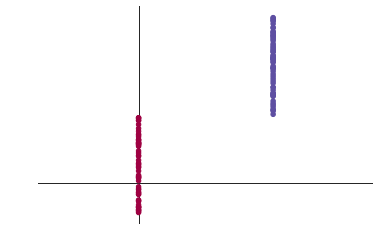

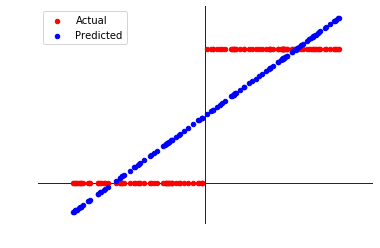

In [39]:
# Plot predictions vs actual data
plot_data(y_hs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_hs, y_pred.view(-1))))
plot_data(x_hs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

### 3.3. `Linear_1H`

In [40]:
# Define model
model_1H = Linear_1H().to(device)

In [41]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred, early_stop[5] = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.21722716093063354
Epoch 1000 loss: 0.07116605341434479
Epoch 2000 loss: 0.06564497202634811
Epoch 3000 loss: 0.06210383027791977
Epoch 4000 loss: 0.06008412688970566
Epoch 5000 loss: 0.05902455747127533
Epoch 6000 loss: 0.058406662195920944
Epoch 7000 loss: 0.05795225873589516
Epoch 8000 loss: 0.05760569870471954
Epoch 9000 loss: 0.05735338106751442
Epoch 10000 loss: 0.05719596520066261


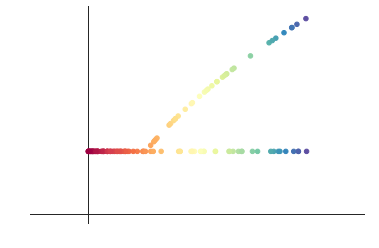

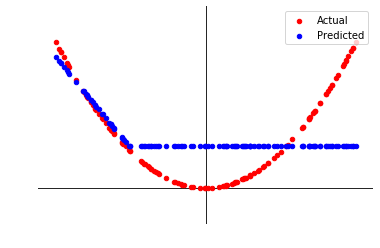

In [42]:
# Plot predictions vs actual data
plot_data(y_quadr, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_quadr, y_pred.view(-1))))
plot_data(x_quadr, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [43]:
# Define model
model_1H = Linear_1H().to(device)

In [44]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[6] = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.04811142757534981
Epoch 1000 loss: 0.02147619239985943
Epoch 2000 loss: 0.018536966294050217
Epoch 3000 loss: 0.015973441302776337
Epoch 4000 loss: 0.013585027307271957
Epoch 5000 loss: 0.011236502788960934
Epoch 5563 loss: 0.009998220019042492


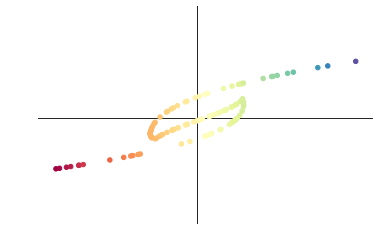

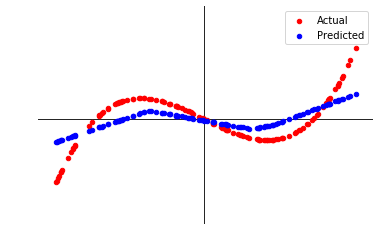

In [45]:
# Plot predictions vs actual data
plot_data(y_cubic, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_cubic, y_pred.view(-1))))
plot_data(x_cubic, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [46]:
# Define model
model_1H = Linear_1H().to(device)

In [47]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[7] = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.5705702900886536
Epoch 1000 loss: 0.06379972398281097
Epoch 2000 loss: 0.06356160342693329
Epoch 3000 loss: 0.06356050819158554
Epoch 4000 loss: 0.06356048583984375
Epoch 5000 loss: 0.06356049329042435
Epoch 6000 loss: 0.06356049329042435
Epoch 7000 loss: 0.06356049329042435
Epoch 8000 loss: 0.06356049329042435
Epoch 9000 loss: 0.06356049329042435
Epoch 10000 loss: 0.06356049329042435


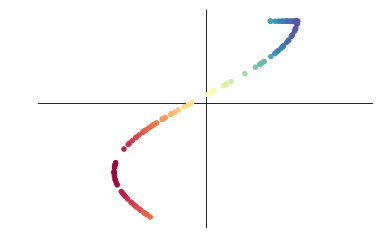

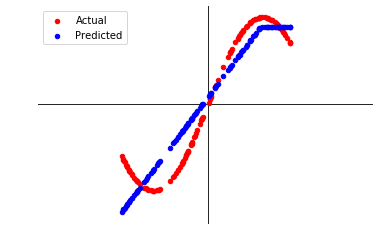

In [48]:
# Plot predictions vs actual data
plot_data(y_sine, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_sine, y_pred.view(-1))))
plot_data(x_sine, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [49]:
# Define model
model_1H = Linear_1H().to(device)

In [50]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[8] = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.6397567987442017
Epoch 616 loss: 0.009989901445806026


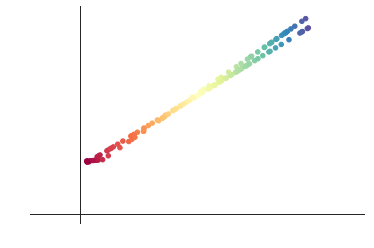

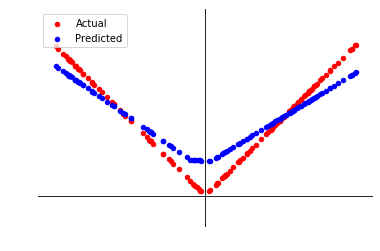

In [51]:
# Plot predictions vs actual data
plot_data(y_abs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_abs, y_pred.view(-1))))
plot_data(x_abs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [52]:
# Define model
model_1H = Linear_1H().to(device)

In [53]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[9] = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.20919395983219147
Epoch 1000 loss: 0.050693996250629425
Epoch 2000 loss: 0.04962567239999771
Epoch 3000 loss: 0.04954696074128151
Epoch 4000 loss: 0.04954203590750694
Epoch 5000 loss: 0.04954174906015396
Epoch 6000 loss: 0.04954173415899277
Epoch 7000 loss: 0.04954173415899277
Epoch 8000 loss: 0.04954173415899277
Epoch 9000 loss: 0.04954173043370247
Epoch 10000 loss: 0.04954173043370247


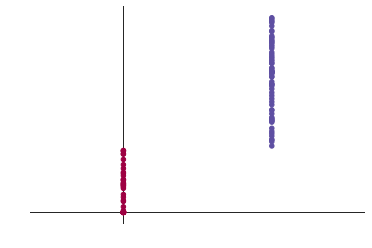

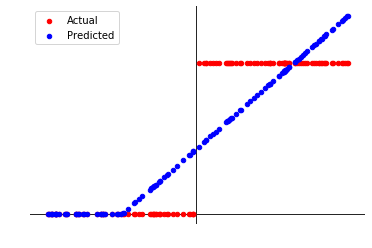

In [54]:
# Plot predictions vs actual data
plot_data(y_hs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_hs, y_pred.view(-1))))
plot_data(x_hs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

### 3.3. `Linear_2H`

In [55]:
# Define model
model_2H = Linear_2H().to(device)

In [56]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[10] = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.4042054414749146
Epoch 1000 loss: 0.08347626775503159
Epoch 2000 loss: 0.08347626775503159
Epoch 3000 loss: 0.08347626775503159
Epoch 4000 loss: 0.08347626775503159
Epoch 5000 loss: 0.08347626775503159
Epoch 6000 loss: 0.08347626775503159
Epoch 7000 loss: 0.08347626775503159
Epoch 8000 loss: 0.08347626775503159
Epoch 9000 loss: 0.08347626775503159
Epoch 10000 loss: 0.08347626775503159


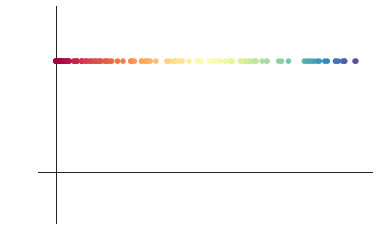

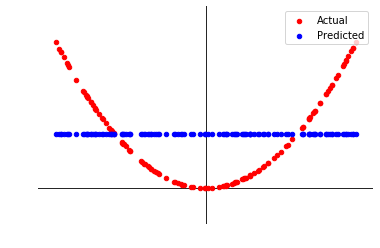

In [57]:
# Plot predictions vs actual data
plot_data(y_quadr, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_quadr, y_pred.view(-1))))
plot_data(x_quadr, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [58]:
# Define model
model_2H = Linear_2H().to(device)

In [59]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[11] = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.055934835225343704
Epoch 1000 loss: 0.019032035022974014
Epoch 2000 loss: 0.01740257441997528
Epoch 3000 loss: 0.01606234721839428
Epoch 4000 loss: 0.014810031279921532
Epoch 5000 loss: 0.01361524872481823
Epoch 6000 loss: 0.012455761432647705
Epoch 7000 loss: 0.011286153458058834
Epoch 8000 loss: 0.010171945206820965
Epoch 8156 loss: 0.009999978356063366


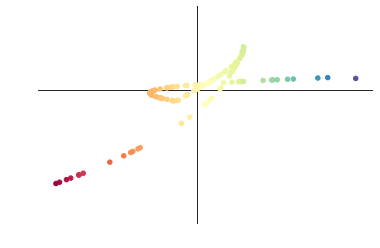

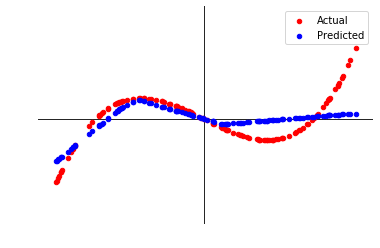

In [60]:
# Plot predictions vs actual data
plot_data(y_cubic, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_cubic, y_pred.view(-1))))
plot_data(x_cubic, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [61]:
# Define model
model_2H = Linear_2H().to(device)

In [62]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[12] = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.8337273001670837
Epoch 1000 loss: 0.01794033870100975
Epoch 2000 loss: 0.013339398428797722
Epoch 3000 loss: 0.011408266611397266
Epoch 4000 loss: 0.010087469592690468
Epoch 4079 loss: 0.009999137371778488


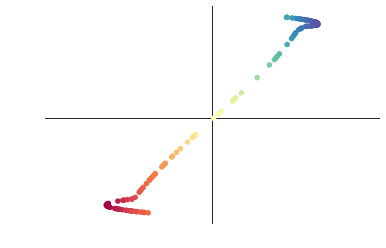

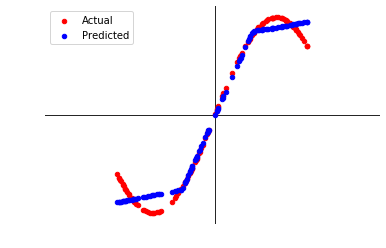

In [63]:
# Plot predictions vs actual data
plot_data(y_sine, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_sine, y_pred.view(-1))))
plot_data(x_sine, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [64]:
# Define model
model_2H = Linear_2H().to(device)

In [65]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred, early_stop[13] = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.10965890437364578
Epoch 1000 loss: 0.06083535775542259
Epoch 2000 loss: 0.055996280163526535
Epoch 3000 loss: 0.05410372093319893
Epoch 4000 loss: 0.05327301844954491
Epoch 5000 loss: 0.05299066752195358
Epoch 6000 loss: 0.05289464071393013
Epoch 7000 loss: 0.05284447595477104
Epoch 8000 loss: 0.052812498062849045
Epoch 9000 loss: 0.052797526121139526
Epoch 10000 loss: 0.05278763920068741


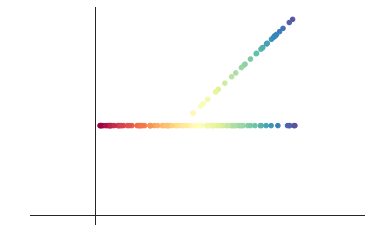

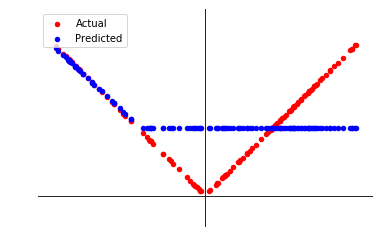

In [66]:
# Plot predictions vs actual data
plot_data(y_abs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_abs, y_pred.view(-1))))
plot_data(x_abs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [67]:
# Define model
model_2H = Linear_2H().to(device)

In [68]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred, early_stop[14] = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.28437933325767517
Epoch 1000 loss: 0.05061150714755058
Epoch 2000 loss: 0.04975109547376633
Epoch 3000 loss: 0.04963527247309685
Epoch 4000 loss: 0.04959141090512276
Epoch 5000 loss: 0.049575868993997574
Epoch 6000 loss: 0.04956526681780815
Epoch 7000 loss: 0.049557577818632126
Epoch 8000 loss: 0.04955192655324936
Epoch 9000 loss: 0.049549318850040436
Epoch 10000 loss: 0.04954800382256508


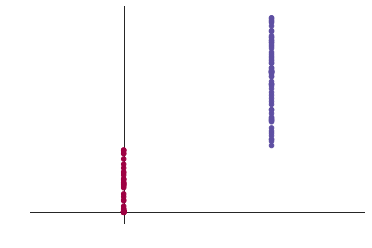

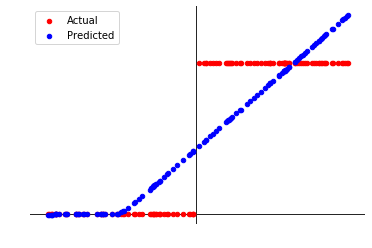

In [69]:
# Plot predictions vs actual data
plot_data(y_hs, y_pred.view(-1), auto=True, title=None)

# Plot input vs predictions and actual data
plt.figure()
data = torch.t(torch.stack((y_hs, y_pred.view(-1))))
plot_data(x_hs, data, color=['r', 'b'], auto=True, legend=['Actual', 'Predicted'])

In [70]:
# Print list of models that stopped early
print(early_stop)

[False, False, False, False, False, False, True, False, True, False, False, True, True, False, False]


### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

#### List: 
    Linear_1H - Cubic function
    Linear_1H - Absolut value
    Linear_2H - Cubic function
    Linear_2H - Sine function